# Домашняя работа 9

### Задание 1.

Выберите датасет, который имеет отношение к вашей области интересов или исследований. Датасет должен содержать неструктурированные данные, требующие разметки для решения конкретной задачи, например, анализа настроений или распознавания именованных сущностей.

### Источник датасета:

https://www.kaggle.com/datasets/coltonbarger/rotten-tomatoes-reviews-for-online-streaming-shows

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle

In [2]:
reviews = pd.read_csv("critic_reviews.csv", encoding='utf-8')
reviews.head()

,Show,Sentiment,Review
0,Mare of Easttown,1,I’m not sure I have engaged in appointment vie...
1,Mare of Easttown,1,Kate is marvelous; she truly is Mare. She disa...
2,Mare of Easttown,1,That’s the thing I’ve loved most about Mare: t...
3,Mare of Easttown,1,"Boasting Kate Winslet in the title role, twist..."
4,Mare of Easttown,1,"Performances in which madness, psychopathy or ..."


In [3]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14791 entries, 0 to 14790
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Show       14791 non-null  object
 1   Sentiment  14791 non-null  int64 
 2   Review     14790 non-null  object
dtypes: int64(1), object(2)
memory usage: 346.8+ KB


<Axes: >

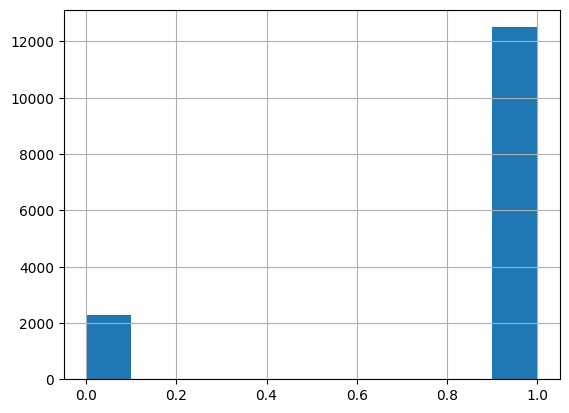

In [4]:
reviews['Sentiment'].hist()

### Задание 2.

Выполните разметку на основе правил (rule-based labeling) на подмножестве выбранного датасета. Разработайте и реализуйте набор правил или условий, которые позволят автоматически присваивать метки данным на основе определенных шаблонов или критериев.

In [5]:
# размеченное и неразмеченное подмножества данных
reviews = shuffle(reviews)
labeled_reviews, unlabeled_reviews = train_test_split(reviews, train_size=0.2, random_state=42)
labeled_reviews

,Show,Sentiment,Review
11242,The Umbrella Academy,1,While The Umbrella Academy borrows plot points...
13189,BoJack Horseman,1,The show's latest season...goes a step further...
2270,The Twilight Zone,1,"Season 2 is satisfyingly spooky and twisted, w..."
1811,Halo,1,"Halo (2022) works for me, and I hope it works ..."
4667,Veep,0,[The] opening gave me hope that I was in for a...
...,...,...,...
102,Loot,1,Its ethical journey finally delivers a pretty ...
1702,The Offer,1,"Godfather cultists, and we are legion, will fi..."
12431,Inventing Anna,1,The true story it's based on is fascinatingly ...
4326,Winning Time: The Rise of the Lakers Dynasty,1,Purists may complain about the recreated baske...


In [6]:
labeled_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2958 entries, 11242 to 5584
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Show       2958 non-null   object
 1   Sentiment  2958 non-null   int64 
 2   Review     2958 non-null   object
dtypes: int64(1), object(2)
memory usage: 92.4+ KB


In [7]:
unlabeled_reviews.head()

,Show,Sentiment,Review
3989,Mare of Easttown,1,A seven-part series whose powers derive as muc...
3692,Doom Patrol,1,Michelle Gomez's arrival on Doom Patrol is pit...
9340,Lost,1,"The themes persist, the characters persist, th..."
3470,Tokyo Vice,1,"It may not be as hip as Miami Vice, but Tokyo ..."
5304,Deadwood,1,"Deadwood is that rarest of all rare birds, a g..."


In [8]:
unlabeled_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11833 entries, 3989 to 6156
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Show       11833 non-null  object
 1   Sentiment  11833 non-null  int64 
 2   Review     11832 non-null  object
dtypes: int64(1), object(2)
memory usage: 369.8+ KB


In [9]:
unlabeled_reviews.isna().sum()

Show         0
Sentiment    0
Review       1
dtype: int64

In [10]:
unlabeled_reviews = unlabeled_reviews.dropna()
unlabeled_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11832 entries, 3989 to 6156
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Show       11832 non-null  object
 1   Sentiment  11832 non-null  int64 
 2   Review     11832 non-null  object
dtypes: int64(1), object(2)
memory usage: 369.8+ KB


In [11]:
# Обучение модели на размеченных данных
def train_model(labeled_data):
    vect = TfidfVectorizer()
    x = vect.fit_transform(labeled_data['Review'])
    y = labeled_data['Sentiment']
    model = LogisticRegression()
    model.fit(x,y)
    return model, vect

model, vect = train_model(labeled_reviews)

In [12]:
x_unlabeled = vect.transform(unlabeled_reviews['Review'])
y_unlabeled_predicted = model.predict(x_unlabeled)

In [13]:
y_unlabeled_proba = model.predict_proba(x_unlabeled)
uncertainty = -(y_unlabeled_proba * np.log2(y_unlabeled_proba)).sum(axis=1)
print(uncertainty)

[0.58980195 0.53875065 0.61375795 ... 0.65963996 0.54177232 0.4492508 ]


In [14]:
# Выбираем 100 самых неопределенных точек данных, разметку которых нужно выполнить вручную
labeled_reviews_new = unlabeled_reviews.iloc[uncertainty.argsort()[:100]]
unlabeled_reviews_new = unlabeled_reviews.iloc[uncertainty.argsort()[100:]]
labeled_reviews_new


,Show,Sentiment,Review
14049,Battlestar Galactica,1,Well-written with some inspired production des...
13050,The Crown,1,Sheesh. It's still a great watch.
9948,Community,1,The heart remains the same. If you loved it be...
12391,Bridgerton,1,"Still beautiful, still fun and still excellent."
2951,We Own This City,1,If you're a fan of The Wire (as I am) and cons...
...,...,...,...
12536,After Life,1,Season three provides a sweet and satisfying f...
119,Loot,1,"The supporting cast is terrific, though my eye..."
12439,Inventing Anna,1,It is one of those shows that plunges you stra...
241,Severance,1,"If you are like me, you are going to finish ea..."


## Задача 3.

Выполните разметку вручную отдельного подмножества выбранного датасета с помощью выбранного вами инструмента разметки.

In [15]:
labeled_reviews_new.to_csv('temp.csv', index=False) # сохранение данных для ручной разметки

pip install label-studio

label-studio

localhost:8081/projects

![img1](ls-1.png)
![img2](ls-2.png)
![img3](ls-3.png)


In [16]:
# загрузка данных после ручной разметки
labeled_reviews_new = pd.read_csv("temp.csv", engine='python', encoding='utf-8', on_bad_lines="skip", encoding_errors="ignore")
labeled_reviews_new

,Show,Sentiment,Review
0,Battlestar Galactica,1,Well-written with some inspired production des...
1,The Crown,1,Sheesh. It's still a great watch.
2,Community,1,The heart remains the same. If you loved it be...
3,Bridgerton,1,"Still beautiful, still fun and still excellent."
4,We Own This City,1,If you're a fan of The Wire (as I am) and cons...
...,...,...,...
95,After Life,1,Season three provides a sweet and satisfying f...
96,Loot,1,"The supporting cast is terrific, though my eye..."
97,Inventing Anna,1,It is one of those shows that plunges you stra...
98,Severance,1,"If you are like me, you are going to finish ea..."


## Задача 4.

Объедините данные, размеченные вручную, с данными, размеченными на основе правил. Объедините два подмножества размеченных данных в один набор данных, сохранив при этом соответствующую структуру и целостность.

In [17]:
labeled_reviews_united = pd.concat([labeled_reviews, labeled_reviews_new])


In [18]:
labeled_reviews_united

,Show,Sentiment,Review
11242,The Umbrella Academy,1,While The Umbrella Academy borrows plot points...
13189,BoJack Horseman,1,The show's latest season...goes a step further...
2270,The Twilight Zone,1,"Season 2 is satisfyingly spooky and twisted, w..."
1811,Halo,1,"Halo (2022) works for me, and I hope it works ..."
4667,Veep,0,[The] opening gave me hope that I was in for a...
...,...,...,...
95,After Life,1,Season three provides a sweet and satisfying f...
96,Loot,1,"The supporting cast is terrific, though my eye..."
97,Inventing Anna,1,It is one of those shows that plunges you stra...
98,Severance,1,"If you are like me, you are going to finish ea..."


## Задача 5.

Обучите модель машинного обучения, используя объединенный набор размеченных данных. Разделите датасет на обучающий и тестовый наборы и используйте обучающий набор для обучения модели.

In [19]:
model, vect = train_model(labeled_reviews_united)

In [20]:
reviews_test = unlabeled_reviews
reviews_test

,Show,Sentiment,Review
3989,Mare of Easttown,1,A seven-part series whose powers derive as muc...
3692,Doom Patrol,1,Michelle Gomez's arrival on Doom Patrol is pit...
9340,Lost,1,"The themes persist, the characters persist, th..."
3470,Tokyo Vice,1,"It may not be as hip as Miami Vice, but Tokyo ..."
5304,Deadwood,1,"Deadwood is that rarest of all rare birds, a g..."
...,...,...,...
1603,They Call Me Magic,1,"“Magic” gives us a lot of material, all of whi..."
12086,The Witcher,1,"By expanding its scope, The Witcher lays out i..."
5862,30 Coins,1,The result is a series that resembles classic ...
8260,Rise,0,When Rise shifts focus to one of Robbie's big ...


In [21]:
x_test = vect.transform(reviews_test['Review'])
y_test_predicted = model.predict(x_test)
y_test_predicted

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

## Задача 6.

Оценить эффективность обученной модели на тестовом датасете. Используйте подходящие метрики оценки. Интерпретируйте результаты и проанализируйте эффективность модели в решении задачи разметки.

In [22]:
f1 = f1_score(reviews_test['Sentiment'], y_test_predicted)
f1

0.9159983502130975